In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Get the CSV File
cricket_data = pd.read_csv("Cricket-all-teams-all-matches.csv")

In [3]:
cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,"Oct 14-17, 2005",Test # 1768,Test
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),"Oct 9, 2005",ODI # 2284,ODI
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),"Oct 7, 2005",ODI # 2283,ODI
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),"Oct 5, 2005",ODI # 2282,ODI


In [4]:
# Remove drawn games
new_cricket_data = cricket_data.dropna()

In [5]:
new_cricket_data.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test


In [6]:
#Restrict Data to just Test matches
test_cricket_data = new_cricket_data.loc[new_cricket_data['Format'] == 'Test ', :]

In [7]:
test_cricket_data.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test


In [8]:
#Add Year Column
test_cricket_data['Year'] = test_cricket_data['Match Date'].str[-4:]

C:\Users\krish\AppData\Local\Temp\ipykernel_18080\280095735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cricket_data['Year'] = test_cricket_data['Match Date'].str[-4:]


In [9]:
#Sort Data By Year
test_cricket_data_sorted = test_cricket_data.sort_values('Year', ascending=True).groupby(['Year', 'Team 1'])

In [10]:
test_cricket_data_sorted.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year
3944,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",Test # 2,Test,1877
3945,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",Test # 1,Test,1877
3943,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",Test # 3,Test,1879
3942,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",Test # 4,Test,1880
3939,Australia,England,Australia,6 wickets,Sydney,"Mar 3-7, 1882",Test # 7,Test,1882
...,...,...,...,...,...,...,...,...,...
971,South Africa,Pakistan,South Africa,10 wickets,Cape Town,"Jan 3-6, 2025",Test # 2576,Test,2025
4601,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",Test # 2579,Test,2025
4600,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",Test # 2580,Test,2025
3493,Zimbabwe,Afghanistan,Afghanistan,72 runs,Bulawayo,"Jan 2-6, 2025",Test # 2574,Test,2025


In [11]:
#Add Wins-Per-Year Column
wins_per_year_team = test_cricket_data_sorted.size().reset_index(name='wins')

In [12]:
wins_per_year_team

,Year,Team 1,wins
0,1877,Australia,2
1,1879,Australia,1
2,1880,England,1
3,1882,Australia,2
4,1882,England,1
...,...,...,...
577,2025,Australia,1
578,2025,Pakistan,2
579,2025,South Africa,1
580,2025,Sri Lanka,2


In [13]:
# Apply a rolling average for smoothing (can make graph smoother, easier to read if needed, for now I will set it to 4)
wins_per_year_team['Smoothed_Wins'] = wins_per_year_team.groupby('Team 1')['wins'].rolling(window=4, center=True).mean().reset_index(level=0, drop=True)

In [14]:
wins_per_year_team.head()

,Year,Team 1,wins,Smoothed_Wins
0,1877,Australia,2,NaN
1,1879,Australia,1,NaN
2,1880,England,1,NaN
3,1882,Australia,2,2.25
4,1882,England,1,NaN


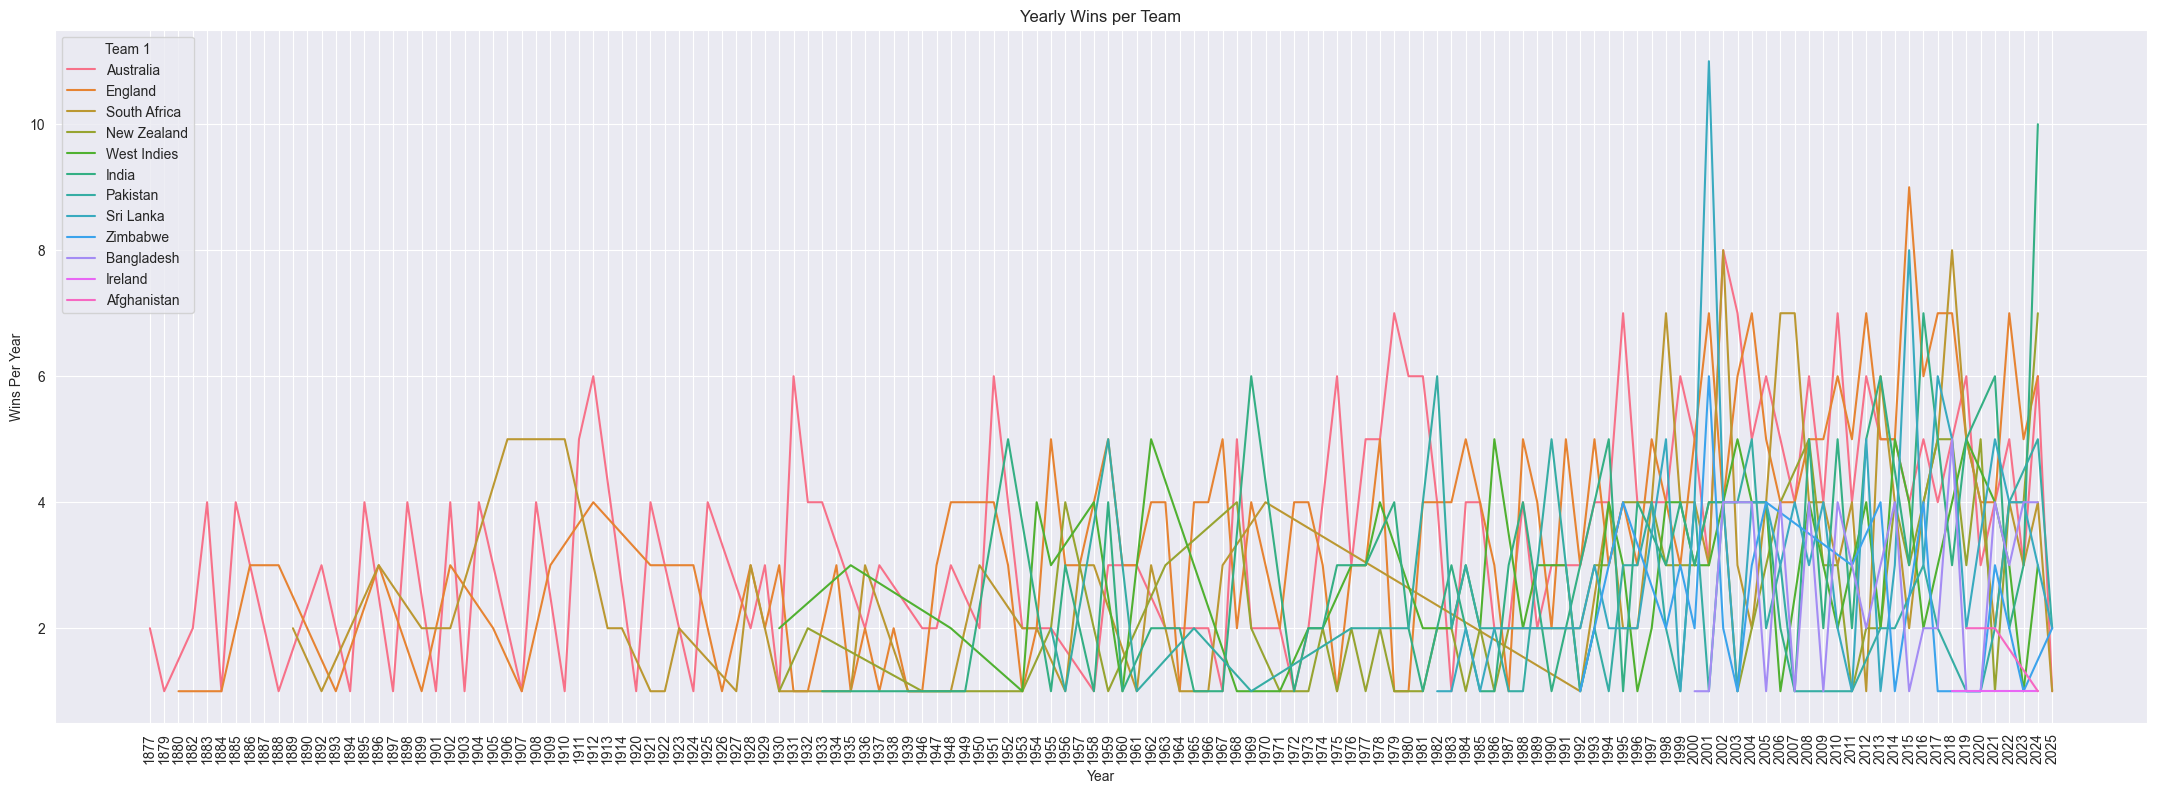

In [15]:
# Plotting using Seaborn (not smoothed) uses the 'wins' column instead of the 'smoothed_wins' column
plt.figure(figsize=(27, 9))
sn.lineplot(data=wins_per_year_team, x='Year', y='wins', hue='Team 1')

plt.title('Yearly Wins per Team')
plt.xlabel('Year')
plt.ylabel('Wins Per Year')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

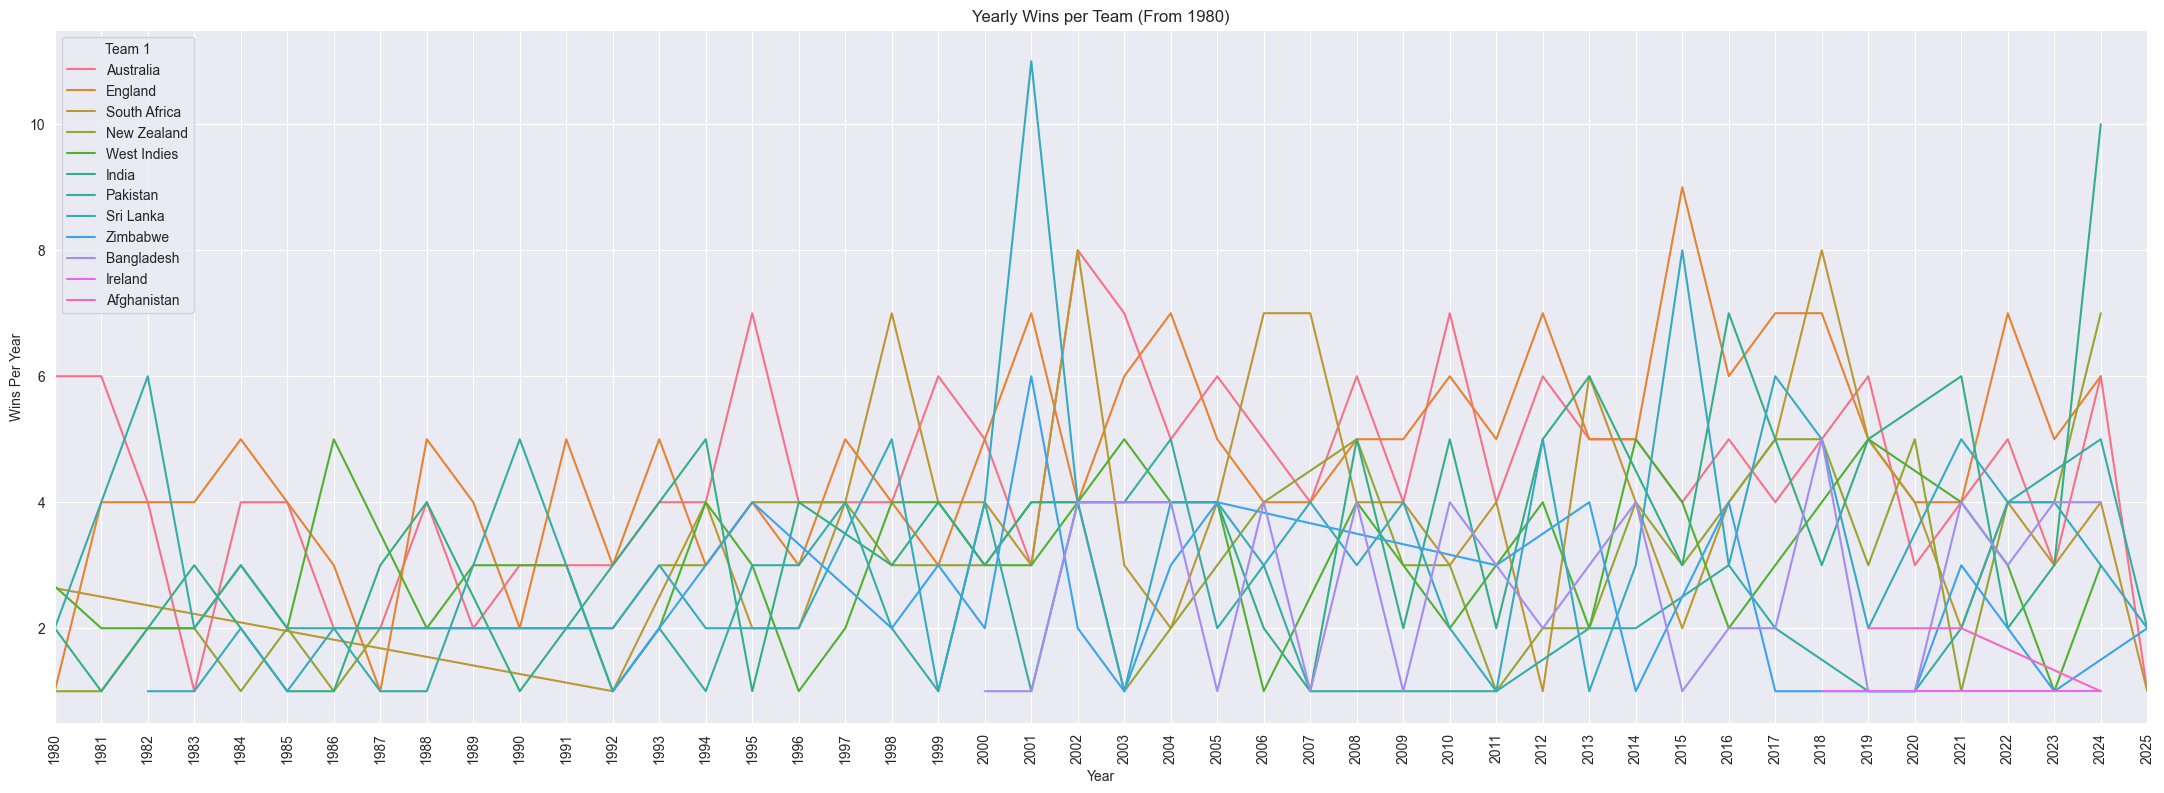

In [16]:
# Copying Graph from above but limiting it to just data from 1980 onwards
plt.figure(figsize=(27, 9))
sn.lineplot(data=wins_per_year_team, x='Year', y='wins', hue='Team 1')

plt.title('Yearly Wins per Team (From 1980)')
plt.xlabel('Year')
plt.ylabel('Wins Per Year')
plt.grid(True)
plt.xticks(rotation=90)
plt.xlim(88, 133)
plt.show()

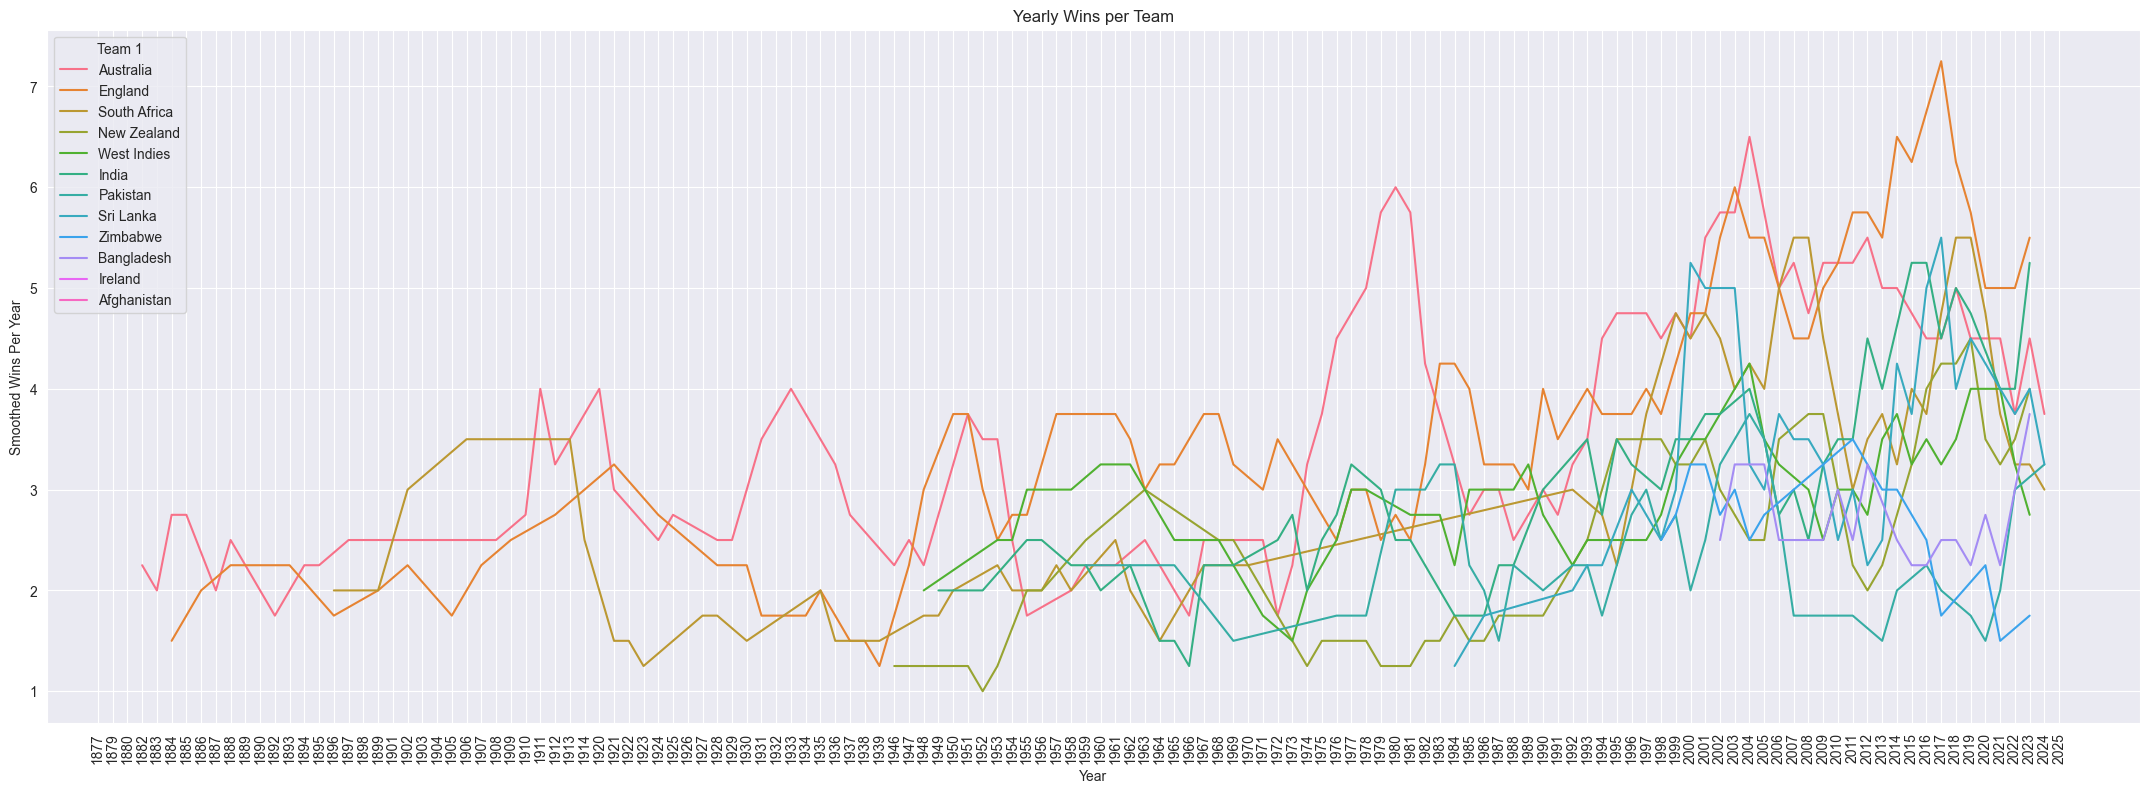

In [17]:
# Remaking both graphs above but with the smoothed column *for better readablilty*
plt.figure(figsize=(27, 9))
sn.lineplot(data=wins_per_year_team, x='Year', y='Smoothed_Wins', hue='Team 1')

plt.title('Yearly Wins per Team')
plt.xlabel('Year')
plt.ylabel('Smoothed Wins Per Year')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

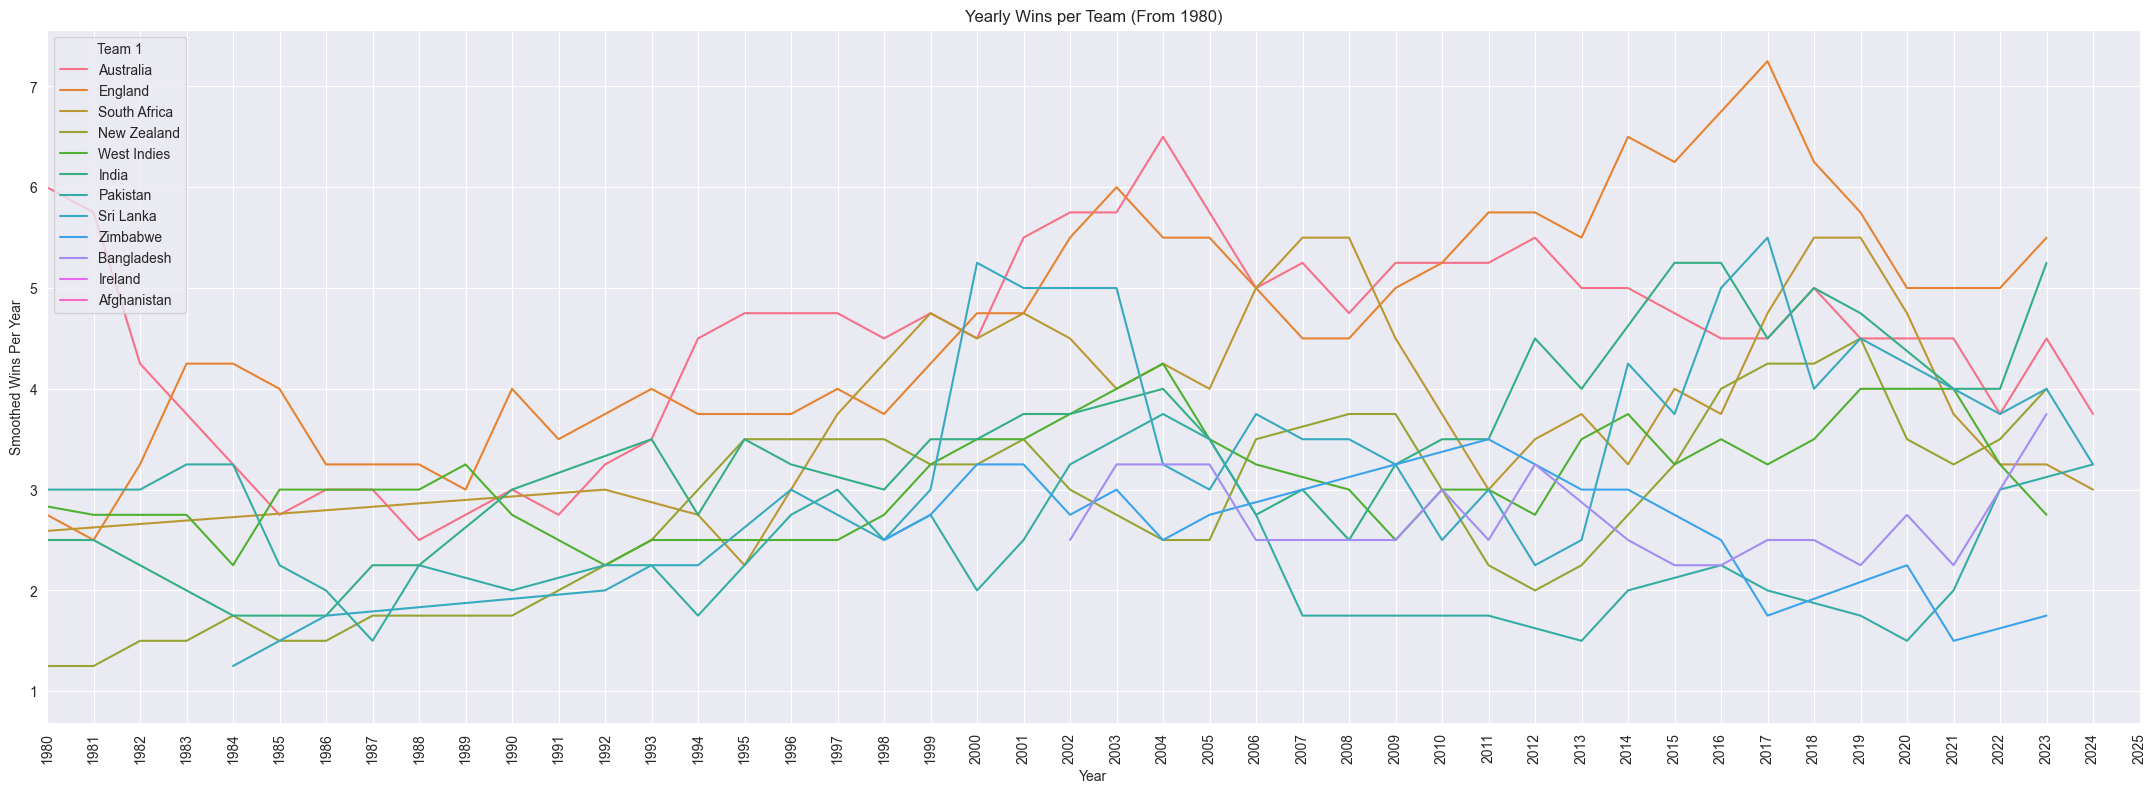

In [18]:
plt.figure(figsize=(27, 9))
sn.lineplot(data=wins_per_year_team, x='Year', y='Smoothed_Wins', hue='Team 1')

plt.title('Yearly Wins per Team (From 1980)')
plt.xlabel('Year')
plt.ylabel('Smoothed Wins Per Year')
plt.grid(True)
plt.xticks(rotation=90)
plt.xlim(88, 133)
plt.show()